<a href="https://colab.research.google.com/github/wanasyraf4/Ikan_kekek2/blob/main/fish_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import ndimage

from google.colab import drive

drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/Dataset/image_119.jpg"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Enter image

(540, 960, 3)


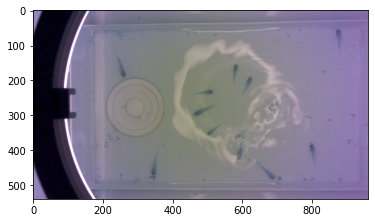

In [262]:
# For colored Image
img = cv2.imread (path,1)   

# img.shape
from google.colab.patches import cv2_imshow

#dimension
dim_img = img.shape
print(dim_img)

plt.imshow(img)


invert

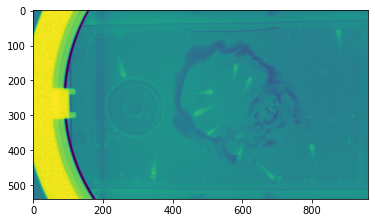

In [263]:
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = cv2.bitwise_not(g)
plt.imshow(g)



0.3025181017140653
0.8351538171414501
1.1376719188555153


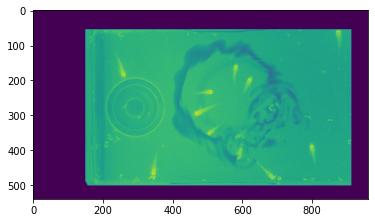

In [264]:

height, width= g.shape[:2]
ROI= np.array([[(150,500),(150,55),(911,55),(911,500)]], dtype= np.int32)

blank= np.zeros_like(g)


roi_g= cv2.fillPoly(blank, ROI,255)

roi_img= cv2.bitwise_and(g, roi_g)


plt.imshow( roi_img)


A = np.sqrt(np.mean(roi_img))/np.sqrt(np.median(roi_img))
y = (-np.mean(roi_img) + np.median(roi_img))/np.median(roi_img)
print (y)
print (A)

Z = A + y
print (Z)

hist

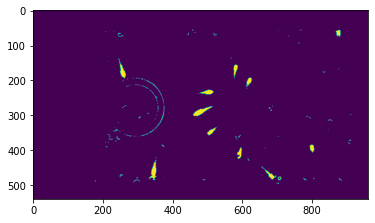

In [265]:
X = np.mean(roi_img)+ Z*np.std(roi_img)
(thresh, bw) = cv2.threshold(roi_img, X, 255, cv2.THRESH_BINARY)
plt.imshow(bw)

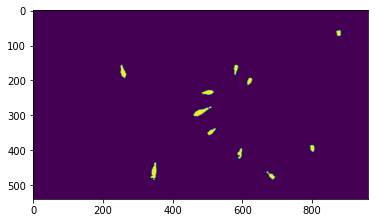

In [266]:
strel = np.ones((4,4),np.uint8)
# opening = cv2.getStructuringElement( cv2.MORPH_ELLIPSE,strel)
ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
# print(cv2.MORPH_OPEN)
result = cv2.morphologyEx(bw, cv2.MORPH_OPEN, ellip)
plt.imshow(result)

In [267]:
# result = cv2.dilate(result, (1,1), iterations = 3)
# plt.imshow(result, cmap ='gray')

(540, 960)


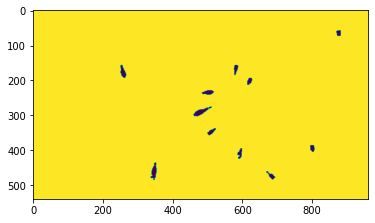

In [268]:

mask = np.full(result.shape,255)

bwboundary= mask - result
bwboundary = bwboundary.astype(np.uint8)

plt.imshow(bwboundary)


dim_bwboundary= bwboundary.shape
print(dim_bwboundary)


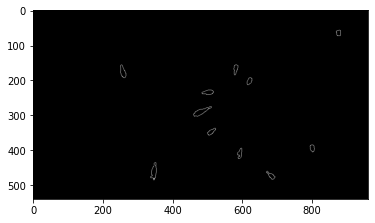

In [269]:
#bwboundary

canny = cv2.Canny(bwboundary, 30, 150, 3)
plt.imshow(canny, cmap ='gray')


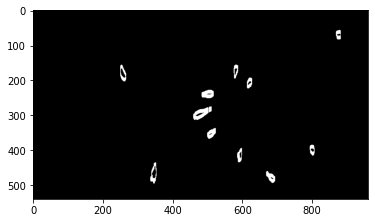

In [270]:
dilated = cv2.dilate(canny, (1,1), iterations = 10)
plt.imshow(dilated, cmap ='gray')

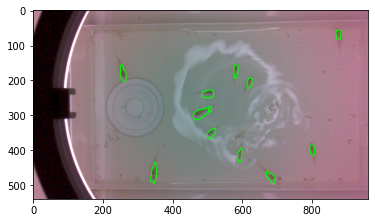

In [271]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
plt.imshow(rgb)

In [272]:
len(cnt)

12